In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
List = [8, 16, 32, 48, 64]
geometry_cell_dict = {'squared': ['rand', 'randZERR', 'randXERR'],
                      'triangular': ['rand', 'randZERR', 'randXERR'],
                      'hexagonal': ['rand', 'randZERR', 'randXERR']}

In [28]:
for geo, cellst in geometry_cell_dict.items():
    for c in cellst:
        for L in List:
            l = Lattice2D(L, geo=geo, sgpath="cluster_data_240328/")
            search_dir = l.phtrapath
            matching_files = find_matching_files(search_dir, c)
            if c == 'rand':
                matching_files = [item for item in matching_files if 'randZERR' not in item and 'randXERR' not in item]
                # Concatenate the found files into the output file
            for fname in matching_files:
            # Construct the full path to open the file
                file_path = os.path.join(search_dir, fname)
                data = np.loadtxt(file_path)
                np.savetxt(file_path, np.atleast_2d(data), fmt='%.7g')

In [4]:
REMOVAL = False
dict_max = {}
for geo, cellst in geometry_cell_dict.items():
    dict_max[geo] = {}
    for c in cellst:
        dict_max[geo][c] = {}
        for L in List:
            l = Lattice2D(L, geo=geo, sgpath="cluster_data_240328/")
            # print(l.syshape)
            search_dir = l.phtrapath
            output_file_name = os.path.join(search_dir, f'cat_{c}.txt')
            if not os.path.exists(output_file_name):
                # print(search_dir, c)
                #
                matching_files = find_matching_files(search_dir, c)
                if c == 'rand':
                    matching_files = [item for item in matching_files if 'randZERR' not in item and 'randXERR' not in item]
                # Concatenate the found files into the output file
                with open(output_file_name, 'w') as outfile:
                    print(matching_files)
                    for fname in matching_files:
                        # Construct the full path to open the file
                        file_path = os.path.join(search_dir, fname)
                        with open(file_path, 'r') as infile:
                            outfile.write(infile.read())
            elif REMOVAL:
                try:
                    os.remove(output_file_name)
                except FileNotFoundError:
                    continue
            else:
                print("loading ", search_dir, end='\r')
                dict_max[geo][c][L] = np.loadtxt(output_file_name)

In [6]:
side = 32
navg = 50
geo = 'squared'
pList = np.linspace(0, 0.15, num=20)
vec = {}
for p in tqdm(pList):
    vec[p] = []
    for na in range(navg):
        l = Lattice2D(side, geo=geo, pflip=p, with_positions=False)
        l.flip_sel_edges(l.nwDict['randZERR']['G'])
        vec[p].append(l.Ne_n)
    vec[p] = np.mean(vec[p])

100%|██████████| 20/20 [00:33<00:00,  1.70s/it]


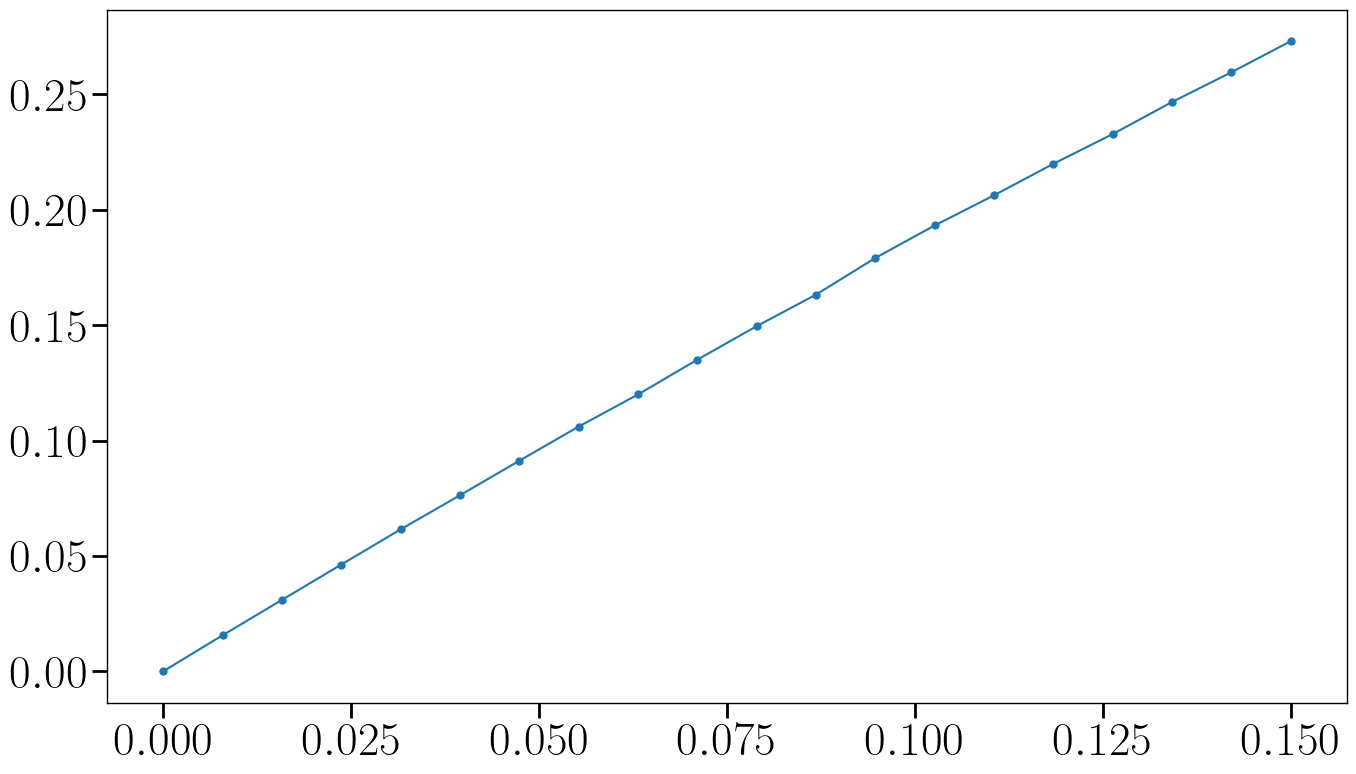

In [8]:
plt.plot(vec.keys(), np.array(list(vec.values()))/l.Ne)
# plt.plot(vec.keys(), 4*np.array(list(vec.keys())))
# plt.xscale('log')
# plt.yscale('log')

In [7]:
List = [8, 16, 32, 48, 64, 96, 128, 192]
plist = np.concatenate((np.logspace(-3, np.log10(0.05), num=5),
                        np.linspace(1e-2, 0.2, num=10),
                        np.linspace(0.2, 0.5, num=5)))
geometry_cell_dict = {'squared': ['rand', 'randZERR', 'randXERR'],
                      'triangular': ['rand', 'randZERR', 'randXERR'],
                      'hexagonal': ['rand', 'randZERR', 'randXERR']}

In [29]:
REMOVAL = False
dict_max = {}
for geo, cellst in geometry_cell_dict.items():
    dict_max[geo] = {}
    for c in cellst:
        dict_max[geo][c] = {}
        for L in List:
            l = Lattice2D(L, geo=geo, sgpath="cluster_data_phtra/")
            search_dir = l.phtrapath
            output_file_name = os.path.join(search_dir, f'cat_{c}.txt')
            if not os.path.exists(output_file_name):
                print(search_dir, end='\r')
                #
                matching_files = find_matching_files(search_dir, c)
                if c == 'rand':
                    matching_files = [item for item in matching_files if 'randZERR' not in item and 'randXERR' not in item]
                # Concatenate the found files into the output file
                with open(output_file_name, 'w') as outfile:
                    for fname in matching_files:
                        # Construct the full path to open the file
                        file_path = os.path.join(search_dir, fname)
                        with open(file_path, 'r') as infile:
                            outfile.write(infile.read())
            elif REMOVAL:
                try:
                    os.remove(output_file_name)
                except FileNotFoundError:
                    continue
            else:
                print("loading ", search_dir, end='\r')
                dict_max[geo][c][L] = np.loadtxt(output_file_name)
            # Optionally, write a newline character between files

In [19]:

for side in List:
    data = dict_max['squared']['rand'][8].reshape(100, 8)
sorted_indices = np.argsort(data[:, 0])
sorted_data = data[sorted_indices]

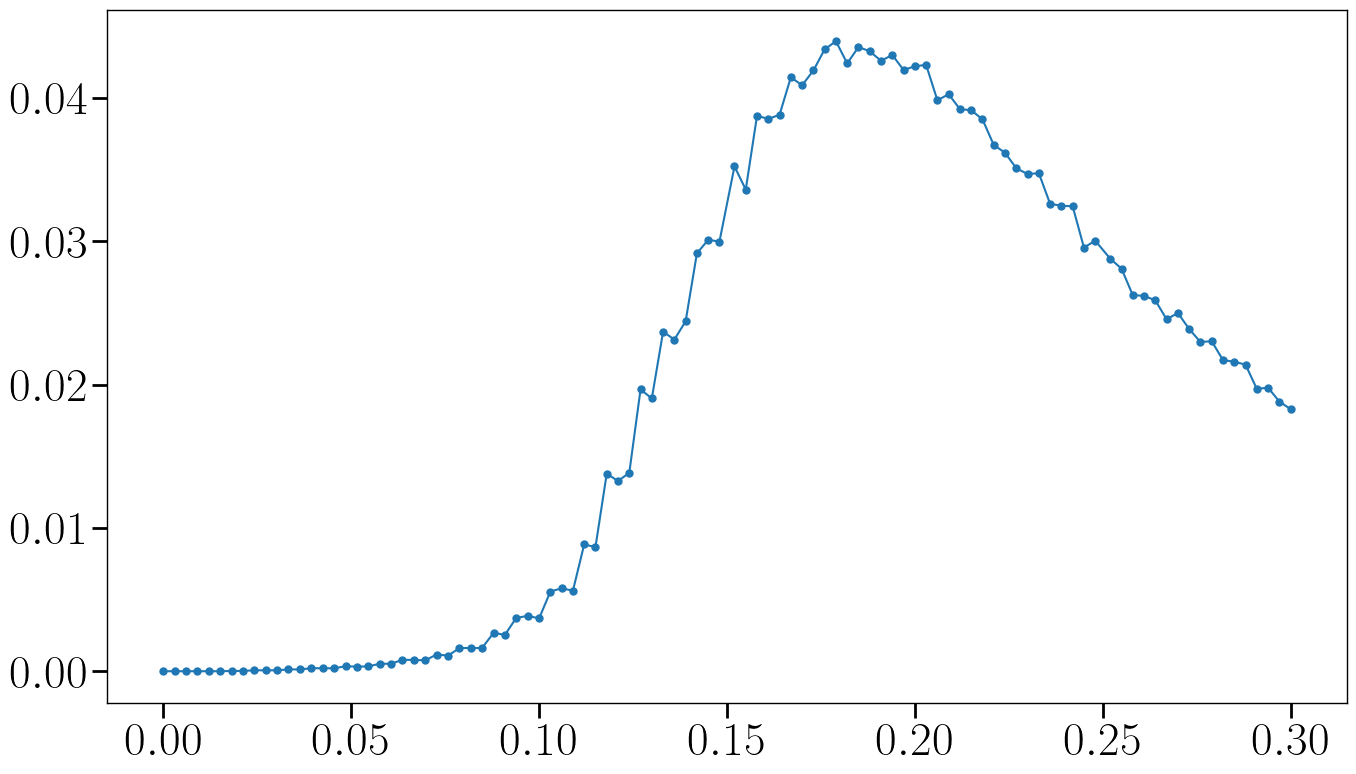

In [22]:
plt.plot(sorted_data[:,0], sorted_data[:,7])

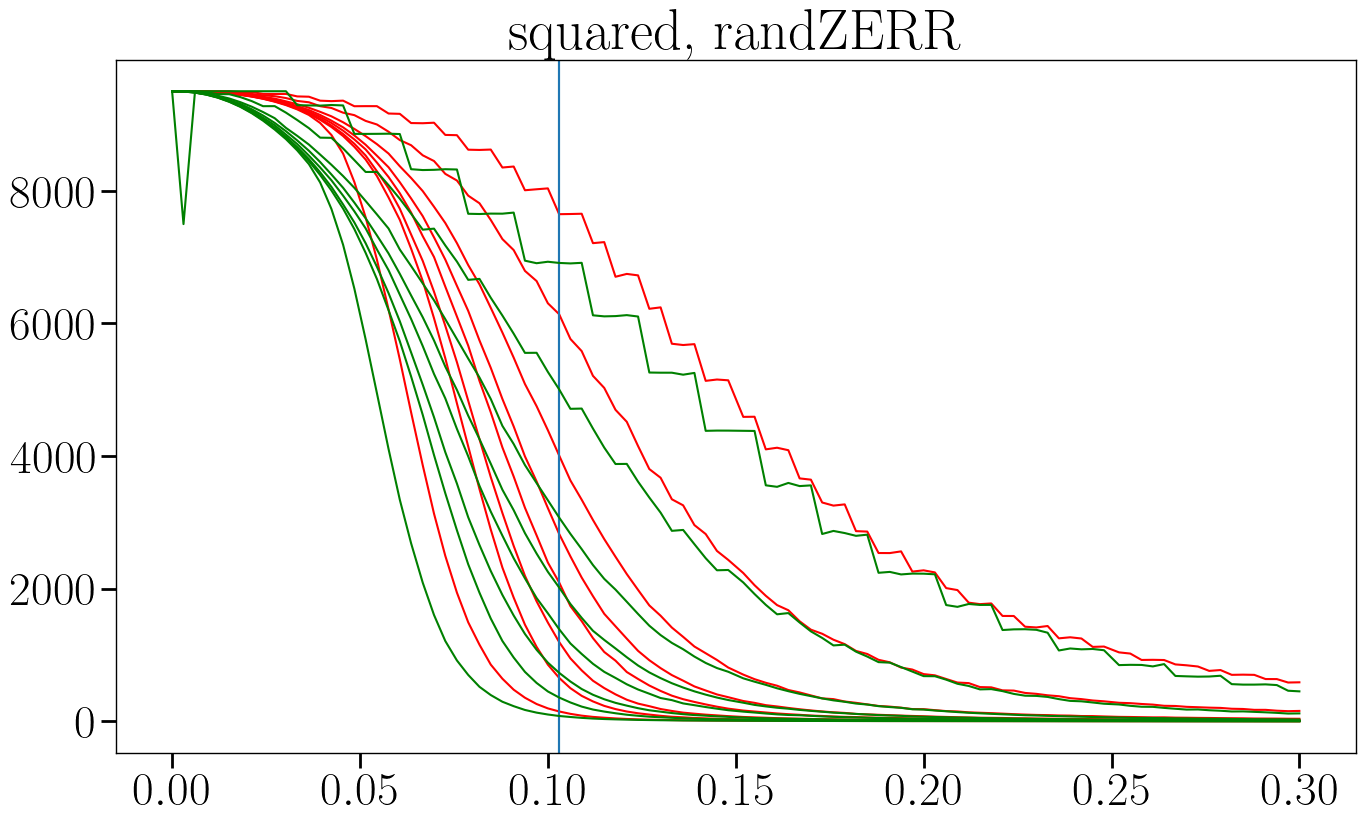

In [44]:
p_c = {'squared': 0.103,
    'triangular': 0.146,
    'hexagonal': 0.065}
geo = 'squared'
fig, ax = plt.subplots()
cellst = ['rand', 'randZERR', ]
for c, cc in zip(cellst, ['red', 'green', 'blue']):
    ax.set_title(f'{geo}, {c}')
    ax.axvline(p_c[geo])
    for L in list(dict_max[geo][c].keys()):
        arr = dict_max[geo][c][L]
        column_index = 0
        try:
            sorted_indices = np.argsort(arr[:, column_index])
            sorted_arr = arr[sorted_indices]
            if c == 'rand':
                ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
            else:
               ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
        except IndexError:
            pass

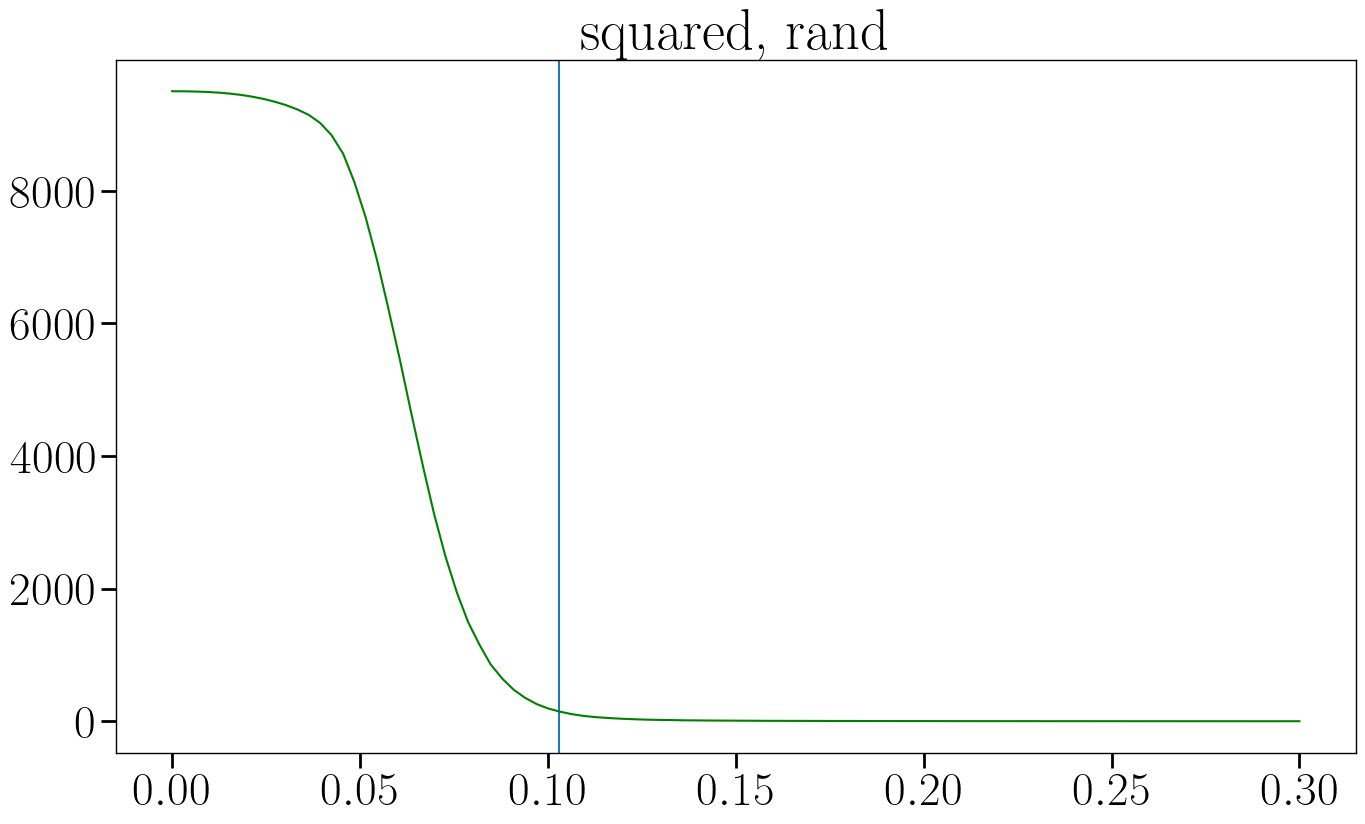

In [43]:
geo = 'squared'
fig, ax = plt.subplots()
cellst = ['rand', 'randZERR']
c = 'rand'
ax.set_title(f'{geo}, {c}')
ax.axvline(p_c[geo])

arr = dict_max[geo][c][L]
column_index = 0
try:
    sorted_indices = np.argsort(arr[:, column_index])
    sorted_arr = arr[sorted_indices]
    if c == 'rand':
        ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
    else:
        ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
except IndexError:
    pass